# Implement Decision Tree for Regression 
# Problem: To predict the salary of an employee based on years of exp. 


## Let us see program flow

![](DT_regression.jpg)

In [ ]:
# Step 1 Load Data
import pandas as pd #Used to data in dataframe
dataset = pd.read_csv('Salary_Data.csv')
dataset.columns # we are printing number of columns / features

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
X = dataset.iloc[:, [0]].values #YearsExperience Column (Independent variable)
y = dataset.iloc[:,[1]].values #Salary column (Dependent Variable)
print(dataset)

    YearsExperience  Salary
0                 1   25000
1                 2   30000
2                 3   32000
3                 4   35000
4                 5   38000
5                 6   40000
6                 7   42000
7                 8   45000
8                 9   47000
9                10   50000
10               11   60000
11               12   75000
12               13   80000
13               14   85000
14               15   90000
15               16  100000
16               17  120000
17               18  130000
18               19  140000
19               20  150000


In [ ]:
# Step 2: We are getting the training data and testing data
# Import library for splitting the dataset into train and test.
from sklearn.model_selection import train_test_split

#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.20)

In [ ]:
print(X_train)

[[ 4]
 [20]
 [ 8]
 [ 3]
 [18]
 [11]
 [13]
 [ 6]
 [ 7]
 [ 5]
 [15]
 [ 2]
 [14]
 [12]
 [ 1]
 [17]]


In [ ]:
print (X_test)

[[16]
 [ 9]
 [10]
 [19]]


In [ ]:
print (y_train)

[[ 35000]
 [150000]
 [ 45000]
 [ 32000]
 [130000]
 [ 60000]
 [ 80000]
 [ 40000]
 [ 42000]
 [ 38000]
 [ 90000]
 [ 30000]
 [ 85000]
 [ 75000]
 [ 25000]
 [120000]]


In [ ]:
print (y_test)

[[100000]
 [ 47000]
 [ 50000]
 [140000]]


In [ ]:
#Step 3: Building the model (Linear Regression, Polynomial Regression and Decision Tree with Regression)

# We are builing the model for Linear Regression using Training data
# Fit Simple Linear Regression to Training Data
from sklearn.linear_model import LinearRegression
regressor_lin = LinearRegression() # we are creating the object of linear regression

#we are creating object of the linearregression class by dynamically.
regressor_lin.fit(X_train, y_train) 
# we are fitting the model by training data


# We are also building the model by polynomial regression
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
#Use this class to define the polynomial of the independent variable

poly_reg = PolynomialFeatures(degree=4) #defining the polynomial degree to the feature
X_poly = poly_reg.fit_transform(X_train) 
# X contains the values of independent variable and it transform as per the polynomial
# which contains the values of indepedent variables values folllowed by degree
# Fitting the model followed by the independent varibale which supports the polynomial degree
# we get the new independent values in terms of degree
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train) 
# our model will be fit towards the polynomial based values of the independent variables

LinearRegression()

In [ ]:
# We are also building the model by decision tree for regression
# import the regressor for decision tree
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object of decision tree
regressor_dt = DecisionTreeRegressor(random_state = 0)  

# We are building the model as per training dataset
# fit the regressor with X_train and Y_train data 
regressor_dt.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [ ]:
print (regressor_lin)
print (regressor_dt)
print (poly_reg)

LinearRegression()
DecisionTreeRegressor(random_state=0)
PolynomialFeatures(degree=4)


In [ ]:
# Step 4: Predict the model by testing data
# predict the model for linear regression
y_pred_lin = regressor_lin.predict(X_test)

y_pred_poly = pol_reg.predict(poly_reg.fit_transform(X_test))

#prediction
y_pred_dt = regressor_dt.predict(X_test) 
#Prediting the model by testing data

In [ ]:
print ("Testing data of exp. year", X_test)
print ("Prediction of testing data by linear regression:", y_pred_lin)
print ("Prediction of testing data by Polynomial regression:", y_pred_poly)
print ("Prediction of testing data by decision tree for regression:", y_pred_dt)

Testing data of exp. year [[16]
 [ 9]
 [10]
 [19]]
Prediction of testing data by linear regression: [[106153.81125227]
 [ 62651.54264973]
 [ 68866.15245009]
 [124797.64065336]]
Prediction of testing data by Polynomial regression: [[106718.50065184]
 [ 50780.0830551 ]
 [ 56012.5561424 ]
 [139893.95687341]]
Prediction of testing data by decision tree for regression: [ 90000.  45000.  60000. 130000.]


In [ ]:
# Step: 5 predicting a new value 
y_pred_lin = regressor_lin.predict([[3.7]])

y_pred_poly = pol_reg.predict(poly_reg.fit_transform([[3.7]]))

y_pred_dt = regressor_dt.predict([[3.7]])
  
# print the predicted price 
print("Predicted salary by Linear Regression: % d\n"% y_pred_lin)
print("Predicted salary by Polynomial Regression: % d\n"% y_pred_poly)
print("Predicted salary: by Decision Tree % d\n:"% y_pred_dt)

# Decision tree provide the better result from the dataset in terms of good accuracy and exact value

Predicted salary by Linear Regression:  29714

Predicted salary by Polynomial Regression:  34096

Predicted salary: by Decision Tree  35000
:


In [ ]:
# Step 6: Model Evaluation
from sklearn.metrics import accuracy_score
accuracy_lin = regressor_lin.score(X_test,y_test)
accuracy_dt = regressor_dt.score(X_test,y_test)

print ("Accuracy of Linear Regression Model in %:",accuracy_lin*100)
print("Accuracy of Decision Tree for Regression Model in %:",accuracy_dt*100)

Accuracy of Linear Regression Model in %: 85.2979487350436
Accuracy of Decision Tree for Regression Model in %: 94.86204419656062


In [ ]:
# How my decision tree look like?

# We are fitting the model as per X and Y values for representing decision tree in graphical way
#Because it was fit by training data set
# We should take all values to print decision tree

# fit the model with X and Y data 
regressor_dt.fit(X_test, y_test) 

DecisionTreeRegressor(random_state=0)

In [ ]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree data values to a ML.dot file 
# which contains the all the values in textual form 
# because of visualizing the plot easily anywhere 
export_graphviz(regressor_dt, out_file ='ML.dot', feature_names =['Salary'])

[[16]
 [ 9]
 [10]
 [19]]
[[100000]
 [ 47000]
 [ 50000]
 [140000]]


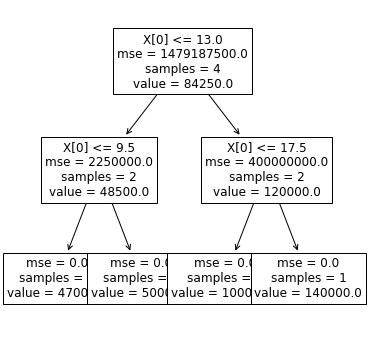

In [ ]:
print (X_test)
print (y_test)

from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
tree.plot_tree(regressor_dt, fontsize=12)
plt.show()

In [ ]:
#We are measuring the impurities of each node
regressor_dt.tree_.impurity

array([1.4791875e+09, 2.2500000e+06, 0.0000000e+00, 0.0000000e+00,
       4.0000000e+08, 0.0000000e+00, 0.0000000e+00])